In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Reloads custom packages after changes are made
%load_ext autoreload
%autoreload 2

## Synthetic Crystal Growth

In [3]:
from crystalgrowth_class import crystalgrowth

In [4]:
cg = crystalgrowth(random_seed=10)

### Choose number of nucleation sites

In [51]:
nuc_array = np.empty((128,128))
nuc_array[:] = np.nan
nuc_array, pos, orients = cg.nucleate(nuc_array,300)

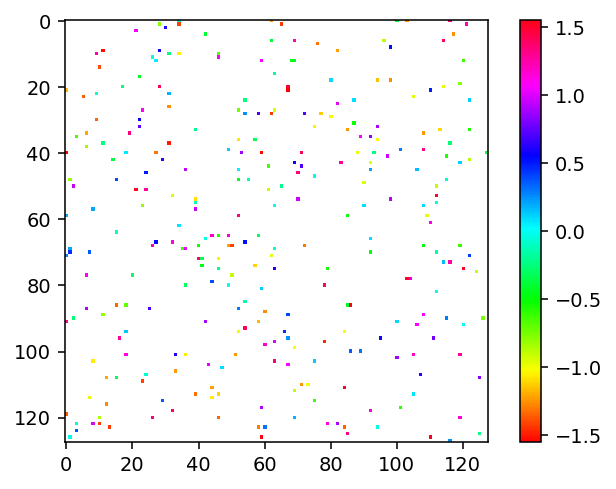

In [52]:
plt.figure(dpi=140)
plt.imshow(nuc_array,cmap='hsv')
plt.colorbar()

### Grow crystals from nucleation sites
* Choose growth anisotropy, and range of orientation mutations

In [53]:
grow_array = cg.grow_complete(nuc_array,growth_anisotropy=5,pi_mutate=np.deg2rad(5),c_mutate=np.deg2rad(5),do_periodic=True)

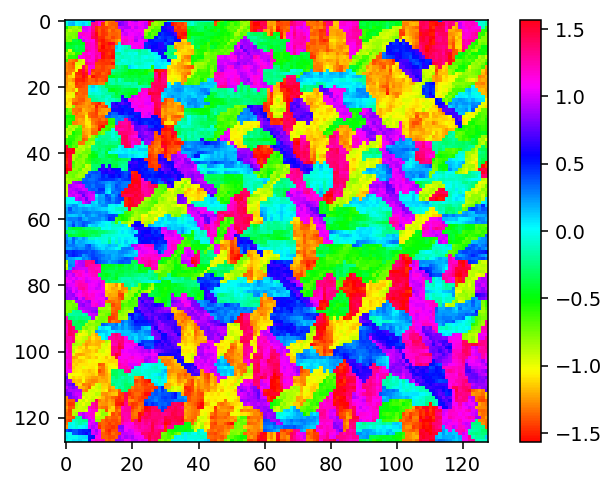

In [54]:
plt.figure(dpi=140)
plt.imshow(grow_array,cmap='hsv',interpolation='none')
plt.colorbar()

## Translator class for translating STEM data

In [51]:
from translator_class import translator

In [52]:
tl = translator()

In [53]:
import glob
flist = glob.glob('*.npy')

In [55]:
ss, q, chi, data = tl.load_npy(flist[0])

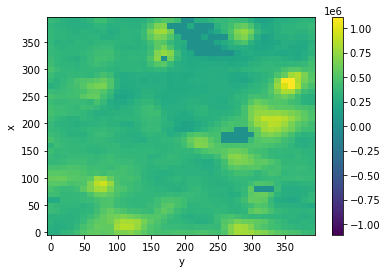

In [68]:
data_sub = tl.subtract_powerlaw(q,data)
data_dark = tl.dark_field(ss,data_sub)
data_dark.plot(cmap='viridis')

### Find and fit arbitrary number of gaussian peaks to data

In [69]:
peaks, num_peaks, data_1d = tl.peak_finder(q, chi, data_sub)

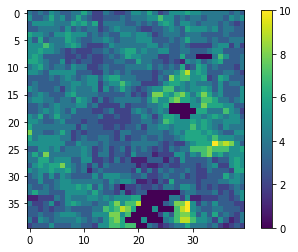

In [72]:
tl.implot(num_peaks)
plt.colorbar()
plt.show()

In [78]:
opt_params = tl.fit_peaks(chi,data_1d,peaks,num_peaks)

In [91]:
peak_int, peak_pos, peak_fwhm, bckgrnd = tl.list_to_array(opt_params,num_peaks)

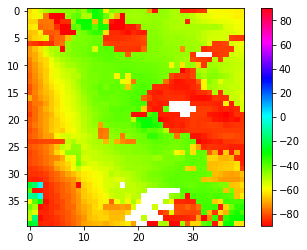

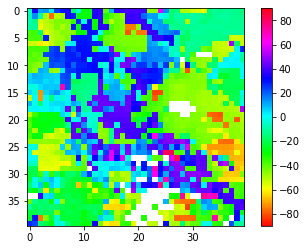

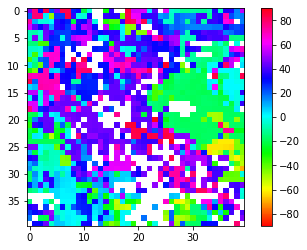

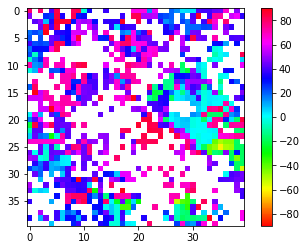

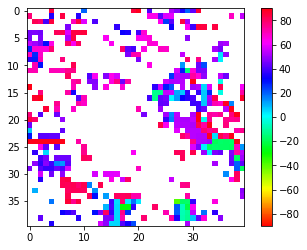

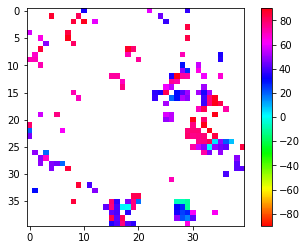

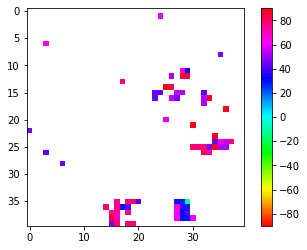

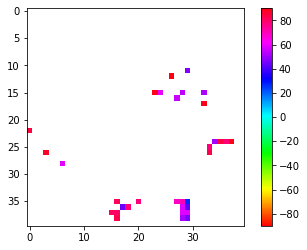

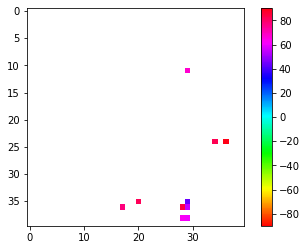

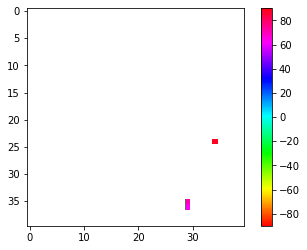

In [428]:
for i in range(peak_pos.shape[-1]):
    plt.figure()
    tl.implot(peak_pos[:,i],cmap='hsv',vmin=-90,vmax=90)
    plt.colorbar()
    plt.show()

## Fiber growth class

In [122]:
from fibergrowth_class import fibergrowth

In [123]:
fg = fibergrowth()

### Fibers with orthorhombic dielectric function

In [429]:
fiberspace, alignmentspace = fg.grow_fibers(100,0,0.1,0.1,5,5,500,fiber_width_sigma=1)

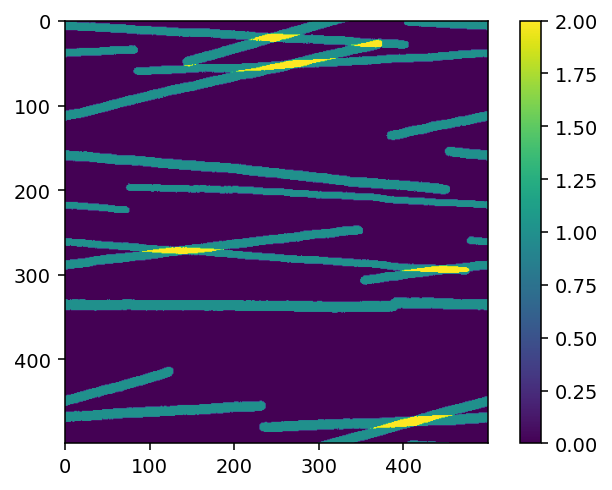

In [404]:
plt.figure(dpi=140)
plt.imshow(fibers)
plt.colorbar()

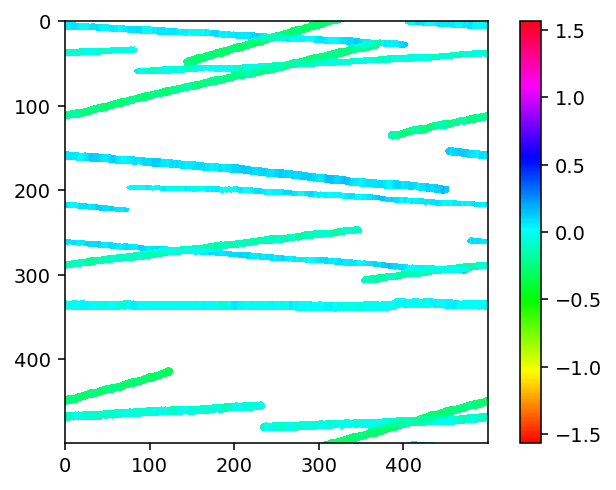

In [405]:
plt.figure(dpi=140)
plt.imshow(orientation,cmap='hsv',vmin=-np.pi/2,vmax=np.pi/2)
plt.colorbar()

### Fibers with helically varying dielectric function

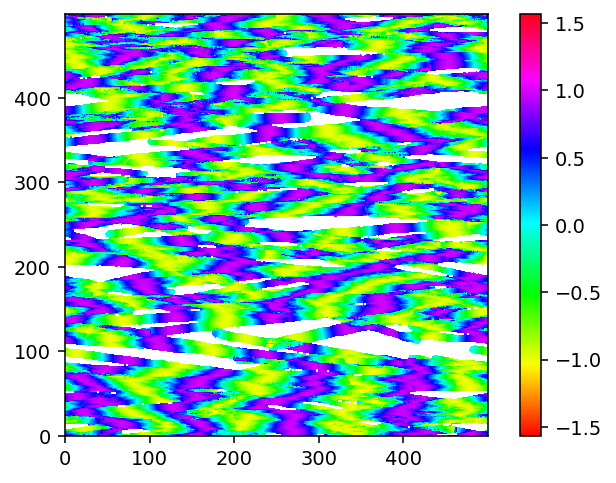

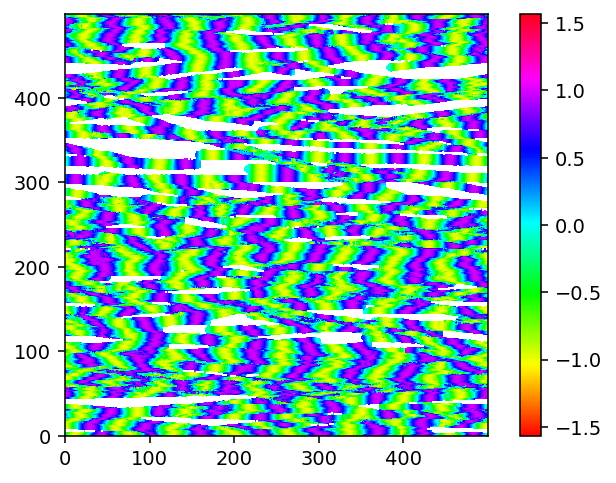

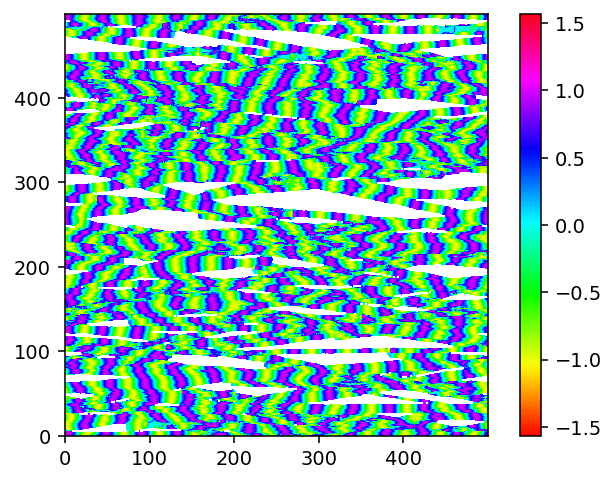

In [415]:
for scale in [0.05,0.1,0.15]:
    fibers2, tan, norm, binorm = fg.grow_helicalfibers(100,0,0.1,0.1,5,5,500,scale,fiber_width_sigma=1,fiber_length=500)
    plt.figure(dpi=140)
    plt.imshow(norm[:,:,1],cmap='hsv',vmin=-np.pi/2,vmax=np.pi/2,origin='lower')
    plt.colorbar()
    plt.show()

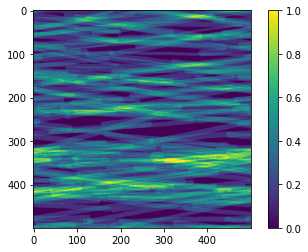

In [425]:
plt.imshow(fibers2/np.mean(fibers2)*0.3,vmax=1)
plt.colorbar()